In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1951_bacteria_4882.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/.DS_Store
/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA/per

In [2]:
!ls -al /kaggle/input/chest-xray-pneumonia/chest_xray

total 0
drwxr-xr-x 7 nobody nogroup 0 Dec  4  2020 .
drwxr-xr-x 3 nobody nogroup 0 Dec  4  2020 ..
drwxr-xr-x 3 nobody nogroup 0 Dec  4  2020 __MACOSX
drwxr-xr-x 5 nobody nogroup 0 Dec  4  2020 chest_xray
drwxr-xr-x 4 nobody nogroup 0 Dec  4  2020 test
drwxr-xr-x 4 nobody nogroup 0 Dec  4  2020 train
drwxr-xr-x 4 nobody nogroup 0 Dec  4  2020 val


2021-12-28 07:48:40.747812: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 07:48:40.829349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 07:48:40.830045: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-28 07:48:40.831305: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 7, 7, 1408)        7768569   
_________________________________________________________________
flatten (Flatten)            (None, 68992)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               17662208  
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 25,432,315
Trainable params: 17,663,234
Non-trainable params: 7,769,081
_________________________________________________________________
Found 5216 images belonging to 2 clas

2021-12-28 07:48:49.900630: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-28 07:48:59.746512: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


82/82 [==============================] - 163s 2s/step - loss: 0.2298 - acc: 0.9316 - val_loss: 0.1590 - val_acc: 0.8750


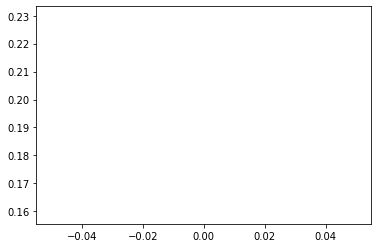

10/10 [==============================] - 9s 954ms/step - loss: 0.4151 - acc: 0.8846
loss= 0.41509687900543213
acc= 0.8846153616905212


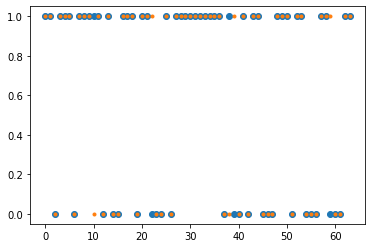

label category index = 1.0
predicted category index = 1
predicted category name = PNEUMONIA


In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_layers.trainable = False

model = models.Sequential()

model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "/kaggle/input/chest-xray-pneumonia/chest_xray/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "/kaggle/input/chest-xray-pneumonia/chest_xray/val",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "/kaggle/input/chest-xray-pneumonia/chest_xray/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=1
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [4]:
import os

import matplotlib.pyplot as plt
import numpy as np

import tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

def build_model():
    conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    conv_layers.trainable = False

    model = tensorflow.keras.models.Sequential()

    model.add(conv_layers)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
    return model

In [5]:
models = []
for i in range(3):
    models.append(build_model())

In [6]:
BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "/kaggle/input/chest-xray-pneumonia/chest_xray/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "/kaggle/input/chest-xray-pneumonia/chest_xray/val",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "/kaggle/input/chest-xray-pneumonia/chest_xray/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
for i in range(3):
    history = models[i].fit(
          train_data_generator,
          validation_data=valid_data_generator,
          epochs=1
    )

82/82 [==============================] - 111s 1s/step - loss: 0.2314 - acc: 0.9298 - val_loss: 0.8260 - val_acc: 0.8125


In [8]:
from sklearn.metrics import accuracy_score

y_ = [model.predict(test_data_generator) for model in models]
y_ = np.array(y_)
summed = np.sum(y_, axis=0)
print(summed[0])
outcomes = np.argmax(summed, axis=1)
print(outcomes)

test_data_generator.batch_size = 9999999

test_x, test_y = next(test_data_generator)

acc = accuracy_score(test_y, outcomes)
print(acc)

[1.7686639 1.231336 ]
[0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1
 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0
 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1
 0 

In [9]:
print(test_y.shape)
print(outcomes.shape)

(624,)
(624,)


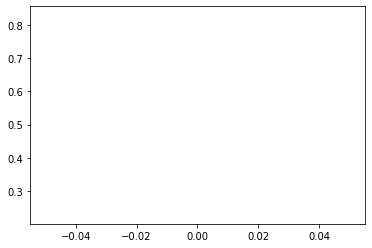

1/1 [==============================] - 8s 8s/step - loss: 0.4151 - acc: 0.8846
loss= 0.41509687900543213
acc= 0.8846153616905212


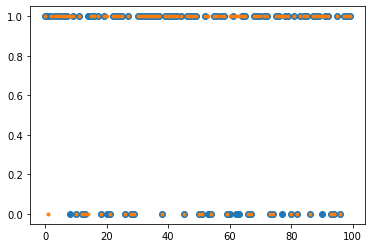

label category index = 1.0
predicted category index = 1
predicted category name = PNEUMONIA


In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = test_data_generator.next()
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y[:100], "o")
plt.plot(predicted[:100], '.')
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", test_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])


In [11]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

def draw_ROC_and_get_AUC(test_y, y_score, n_classes=2):

  test_y = np.eye(n_classes)[test_y]
  y_score = np.eye(n_classes)[y_score]

  # Plot linewidth.
  lw = 2

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # Compute macro-average ROC curve and ROC area

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure(1)
  plt.plot(fpr["macro"], tpr["macro"],
          label='ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=4)

  colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Some extension of Receiver operating characteristic to multi-class')
  plt.legend(loc="lower right")
  plt.show()

  return roc_auc["macro"]

In [12]:
test_y = test_y.astype(np.int16)

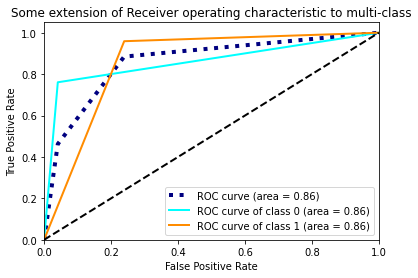

AUC  0.8598290598290598
[[178  56]
 [ 16 374]]
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       234
           1       0.87      0.96      0.91       390

    accuracy                           0.88       624
   macro avg       0.89      0.86      0.87       624
weighted avg       0.89      0.88      0.88       624



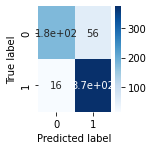

In [13]:
## ROC 그리기, AUC 출력

auc = draw_ROC_and_get_AUC(test_y, predicted, n_classes=2)
print("AUC ", auc)



## Confusion Matric

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

print(classification_report(test_y, predicted, target_names=['0','1']))

import seaborn as sns

figure = plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()